# Homework I - Emanuele Frasca 1836098

In this report, we will analyze and describe our methodology for classifying two given datasets using Machine Learning algorithms. The report for this homework is available as a pdf file allegated to the submission.

We need to import the library used for this project.

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from joblib import dump, load
import matplotlib.pyplot as plt

We use the function given by the professor to load data from dataset 1 and 2 from a csv that gives in output numpy arrays X and Y

In [35]:
def load_data(csv_filepath):
    '''
    Load data from a csv file.

    :param csv_filepath: path of the .csv file containing the data to load/extract

    :return X: array of values associated with the inputs of the data contained in the .csv file
    :return Y: array of values associated with the labels of the data contained in the .csv file or None if the file does not contain labels
    '''

    data = pd.read_csv(csv_filepath)

    # Headers' list:
    headers = data.columns # 'x' for inputs, 'y' for labels

    # Extract DataFrames based on the headers:
    x_data = data[headers[0]]

    # Convert an array-like string (e.g., '[0.02, 1.34\n, 2.12, 3.23\n]')
    # into an array of floats (e.g., [0.02, 1.34, 2.12, 3.23]):
    X_data = [[float(feature) for feature in feature_vec.replace('[', '').replace(']', '').split()] for feature_vec in x_data]

    # convert data into numpy arrays
    X = np.array(X_data)

    if len(headers)>1:
        Y_data = data[headers[1]]
        Y = np.array(Y_data)
    else:
        Y = None

    return X, Y

# Dataset 1

### Data loading and analysis

At first we load the data from the csv file and we analyze it to understand how it is structured. In particolare we print the shape of the dataset and we check if there are missing values. Then we use pandas to print a statistical summary of the dataset. Finally we use a StandardScaler to normalize the data.

In [18]:
# Load of the first dataset
X_1, y_1 = load_data("dataset1.csv")

# Printing of the shape of the dataset 1
print("X_1 shape:", X_1.shape)
print("y_1 shape:", y_1.shape)

# Printing of the number of missing values in the dataset 1
print("Total missing values in X_1:", pd.DataFrame(X_1).isnull().sum().sum())
print("Missing values in Y_1", pd.DataFrame(y_1).isnull().sum().sum())

# Printing of the description of the data
print(pd.DataFrame(X_1).describe())

# Applying the StandardScaler to the dataset 1
scaler_1 = StandardScaler()
X_1 = scaler_1.fit_transform(X_1)


X_1 shape: (50000, 100)
y_1 shape: (50000,)
Total missing values in X_1: 0
Missing values in Y_1 0
                 0             1             2             3             4   \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean       0.378181      1.317949      0.009003      1.391512      1.814728   
std        0.516047      1.496512      0.050664      1.230377      1.508633   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.248946      0.000000      0.409221      0.463299   
50%        0.075048      0.910430      0.000000      1.076016      1.624676   
75%        0.608842      1.645869      0.000000      2.084849      2.857240   
max        3.206600      8.212224      0.748968      6.523547      6.554948   

                 5             6             7             8             9   \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean       0.011052      0.3698

Now we have to divide our datasets in train-set and test-set, for this we use the bult-in function on klearn train_test_split. We use 80% of the dataset for training and 20% for testing. We also set the random_state to 42 to have the same results every time we run the code. 

In [19]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

Finally we load the blinded test-sets in memory.

In [36]:
X_blind_1, y_blind_1 = load_data("blind_test1.csv")

We use different Machine Learning models to train our dataset and compare the results. To have a better robustness we use the cross validation method. We use the function cross_val_score from sklearn.model_selection to compute the score of each model. We use the mean of the scores to have a better estimation of the model performance. To find the best hyperparameters we use the GridSearchCV function from sklearn.model_selection. This is used to find the best hyperparameters for each model. We use the best hyperparameters to train the model and then we compute the score on the test-set.

In a ML problem is important to have a deep understanding of the models that can be used basing on the dataset given. Since we are facing a classification problem we have a large range of models that can be used. In this report we are going to use three different models: Support Vector Machine, K-Nearest Neighbors and Random Forest. We choose this models because of their simplicity and their effectiveness so that we don't have to require a lot of computational power to train them.

### Support Vector Machine

The Support Vector Machine algorithm is a supervised machine learning algorithm that can be used for both classification or regression. However, it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes in the best way.

We define a Support Vector Machine using the scikit-learn packpage.

In [64]:
# Parameters to be tested
param_grid = {'C': [1, 0.1, 0.01],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['linear', 'poly']}

# Make the grid search on a SVC classifier using the parameters above
grid_search = GridSearchCV(SVC(), param_grid, cv=3, verbose=3, n_jobs=16)
grid_search.fit(X_train_1, y_train_1)

# Print the best parameters found and the best cross validation score found
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


Best parameters:  {'C': 0.01, 'gamma': 1, 'kernel': 'linear'}
Best cross-validation score: 0.9888499631119846


Now we can print the results of the grid search and find the best hyperparameters for our model.

In [65]:
df = pd.DataFrame(grid_search.cv_results_)
print(df)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       28.109108      6.193581         9.238238        0.361492       1   
1       27.167666      8.100396         5.189309        1.294030       1   
2       17.009406      7.248767         5.157259        2.583910       1   
3       28.485719     15.285246        10.785343        6.248324       1   
4       26.569249     10.335705         6.112875        2.478121       1   
5       80.788769     26.272895        13.148609        4.880048       1   
6       16.254465      7.815262         5.918845        3.965358     0.1   
7       18.249754      7.286533         7.773008        4.425669     0.1   
8       13.864393      8.053990         6.444173        5.017113     0.1   
9       32.014033     11.732044         8.856524        1.751117     0.1   
10      14.600631     11.516749         7.907055        5.992496     0.1   
11     135.837979     18.446840        15.838210        3.194990     0.1   
12      36.2

We can easly take the best model using the best_estimator_ attribute of the GridSearchCV object:

In [37]:
best_model_svm_1 = load("best_model_svm_1.joblib")

In [66]:
best_model_svm_1 = grid_search.best_estimator_
dump(best_model_svm_1, 'best_model_svm_1.joblib')

['best_model_svm_1.joblib']

To make an analysis of the model we can print the classification report and the confusion matrix.

[3 8 8 ... 5 1 7]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       973
           1       1.00      0.99      1.00       979
           2       1.00      0.99      0.99      1030
           3       0.96      0.96      0.96      1023
           4       0.99      0.99      0.99       933
           5       0.96      0.97      0.96      1015
           6       0.99      0.99      0.99       996
           7       0.99      0.99      0.99       994
           8       1.00      1.00      1.00      1017
           9       0.99      1.00      0.99      1040

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 967    0    0    2    0    0    0    0    2    2]
 [   0  974    0    2    0    0    0    0    0    3]
 [   4    0 1016    2    2    2    3    1    0    0]
 [   0    0    3  984    2   31    2    1    0    0]
 [   0    0

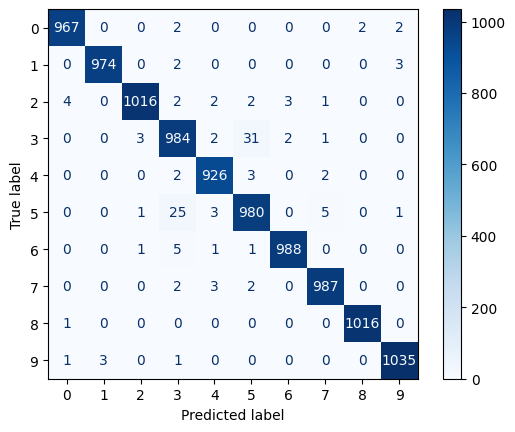

In [41]:
# Predict the labels of the test set
Y_pred_1 = best_model_svm_1.predict(X_test_1)

# Predict the labels of the blind set
Y_blind_1 = best_model_svm_1.predict(X_blind_1)

# Create a DataFrame with the predictions
predictions = pd.DataFrame(Y_blind_1)

# Save the predictions DataFrame to a .csv file
predictions.to_csv('d1_1836098.csv', index=False)

# Print the classification report
print(classification_report(y_test_1, Y_pred_1))

# Print the confusion matrix
print(confusion_matrix(y_test_1, Y_pred_1))

# Print the accuracy
print("Accuracy:", accuracy_score(y_test_1, Y_pred_1))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test_1, Y_pred_1)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model_svm_1.classes_)
disp.plot(cmap=plt.cm.Blues)

# Save the plot
plt.savefig('confusion_matrix_svm_1.png', dpi=300)

# Show the plot
plt.show()

### K-Nearst Neighbors

In this paragraph we use the K-Nearst Neighbors that is an instance-based algorithm. This algorithm doesn't need a training phase, so we can directly use it to predict the labels of the test-set without "having to learn" the dataset itself. This is not necessary because in the KNN the algorithm memorises all the train-set and to predict the labels of the test-set it uses the data itself. The predictions are based on the distance between the new point and the k points of the train-set. When a new point arrives for which you want to make a prediction, the algorithm looks for the k nearest points to that point in the stored dataset and makes a prediction based on these neighbors.

In [68]:
# Parameters to be tested
param_grid = {'n_neighbors': [6,7,8],
              'metric': ['euclidean', 'manhattan'],
              'weights': ['uniform', 'distance']
             }

# Make the grid search on a KNN classifier using the parameters above
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, verbose=3, n_jobs=16)

# Fit the grid search using the training set
grid_search.fit(X_train_1, y_train_1)

# Print the best parameters found and the best cross validation score found
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: {:.5f}".format(grid_search.best_score_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


Best parameters:  {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Best cross-validation score: 0.98735


In [69]:
df = pd.DataFrame(grid_search.cv_results_)
print(df)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_metric  \
0        0.225662      0.166204        36.376869        8.869375    euclidean   
1        0.360260      0.211880        26.118925        3.067254    euclidean   
2        0.168521      0.032163        31.970129       11.361327    euclidean   
3        0.535099      0.213724        29.926586       11.705692    euclidean   
4        0.488027      0.184025        25.871900       11.764995    euclidean   
5        0.351104      0.246944        25.882659       10.563660    euclidean   
6        0.351244      0.141545        78.292917       20.639604    manhattan   
7        0.160852      0.089183        85.555418       23.793578    manhattan   
8        0.360469      0.057339        83.862288       27.573100    manhattan   
9        0.207192      0.130336        67.086807       18.349369    manhattan   
10       0.216017      0.141216        65.950419       15.946645    manhattan   
11       0.375419      0.022

We can easly take the best model using the best_estimator_ attribute of the GridSearchCV object:

In [23]:
best_model_knn_1 = load("best_model_knn_1.joblib")

In [70]:
best_model_knn_1 = grid_search.best_estimator_
dump(best_model_knn_1, 'best_model_knn_1.joblib')

['best_model_knn_1.joblib']

Now we can predict using the best model (so with the best parameters) found with the grid-search.

Accuracy: 0.985
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       973
           1       1.00      0.99      0.99       979
           2       0.99      0.98      0.99      1030
           3       0.95      0.96      0.96      1023
           4       0.99      0.99      0.99       933
           5       0.96      0.96      0.96      1015
           6       0.99      0.99      0.99       996
           7       0.99      0.99      0.99       994
           8       1.00      1.00      1.00      1017
           9       0.99      1.00      1.00      1040

    accuracy                           0.98     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.98      0.99     10000

[[ 967    0    0    1    0    0    0    0    2    3]
 [   0  973    0    2    0    0    0    0    1    3]
 [   5    0 1013    3    2    4    3    0    0    0]
 [   0    0    7  979    0   33    3    1    0    0]
 [   0    0  

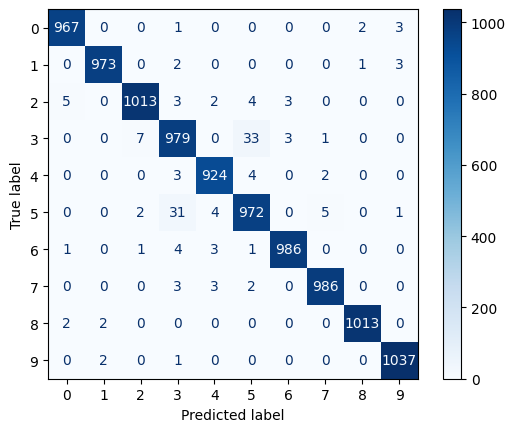

In [24]:
# Predict the labels of the test set
Y_pred_1 = best_model_knn_1.predict(X_test_1)

# Print the accuracy
print("Accuracy:", accuracy_score(y_test_1, Y_pred_1))

# Print the classification report
print(classification_report(y_test_1, Y_pred_1))

# Print the confusion matrix
print(confusion_matrix(y_test_1, Y_pred_1))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test_1, Y_pred_1)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model_knn_1.classes_)
disp.plot(cmap=plt.cm.Blues)

# Save the plot
plt.savefig('confusion_matrix_knn_1.png', dpi=300)

### Random Forest

The Random Forest algorithm is an ensemble learning method for classification and regression. It operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set. 

In [72]:
# Parameters to be tested
param_grid = {
    'n_estimators': [5,10],
    'max_depth': [None, 3],
    'min_samples_split': [2,3],
    'min_samples_leaf': [1, 2]
}

# Make the grid search on a RandomForestClassifier using the parameters above
grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=3, n_jobs=16, verbose=3)

# Fit the grid search
grid_search.fit(X_train_1, y_train_1)

# Print the best parameters found and the best cross validation score found
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: {:.5f}".format(grid_search.best_score_))

Fitting 3 folds for each of 16 candidates, totalling 48 fits


Best parameters:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 10}
Best cross-validation score: 0.98595


In [73]:
df = pd.DataFrame(grid_search.cv_results_)
print(df)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       10.919355      4.697970         0.107884        0.052401   
1       20.085247      7.511730         0.064659        0.011516   
2       12.417538      2.302275         0.066300        0.040077   
3       18.959945      8.570323         0.141552        0.100668   
4       12.069461      4.047420         0.110147        0.053072   
5       21.358748      9.130455         0.074655        0.008552   
6        8.293982      5.818270         0.078817        0.049326   
7       18.209593      2.471000         0.059908        0.005963   
8        2.903640      2.154326         0.071386        0.051930   
9        5.525107      3.248536         0.062085        0.005201   
10       4.517371      2.174069         0.091884        0.043753   
11       2.954371      0.032613         0.071717        0.008127   
12       3.041216      2.017038         0.071294        0.047591   
13       3.049778      0.004496         0.069071

We can easly take the best model using the best_estimator_ attribute of the GridSearchCV object:

In [25]:
best_model_rf_1 = load("best_model_rf_1.joblib")

In [74]:
best_model_rf_1 = grid_search.best_estimator_
dump(best_model_rf_1, 'best_model_rf_1.joblib')

['best_model_rf_1.joblib']

Now we can predict using the best model (so with the best parameters) found with the grid-search.

Accuracy: 0.9843
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       973
           1       0.99      0.99      0.99       979
           2       0.99      0.98      0.99      1030
           3       0.95      0.96      0.95      1023
           4       0.99      0.99      0.99       933
           5       0.96      0.96      0.96      1015
           6       1.00      0.99      0.99       996
           7       0.99      0.99      0.99       994
           8       1.00      1.00      1.00      1017
           9       0.99      0.99      0.99      1040

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

[[ 964    0    3    1    0    0    0    0    2    3]
 [   0  973    0    2    0    0    0    0    0    4]
 [   4    0 1013    4    4    3    2    0    0    0]
 [   0    0    5  981    2   30    2    2    0    1]
 [   0    0 

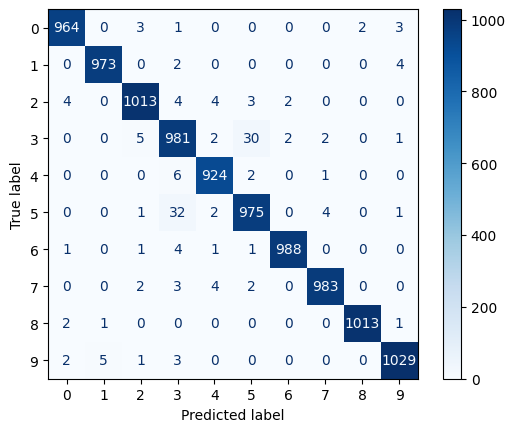

In [26]:
# Predict the labels of the test set
Y_pred_1 = best_model_rf_1.predict(X_test_1)

# Print the accuracy
print("Accuracy:", accuracy_score(y_test_1, Y_pred_1))

# Print the classification report
print(classification_report(y_test_1, Y_pred_1))

# Print the confusion matrix
print(confusion_matrix(y_test_1, Y_pred_1))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test_1, Y_pred_1)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model_rf_1.classes_)
disp.plot(cmap=plt.cm.Blues)

# Save the plot
plt.savefig('confusion_matrix_rf_1.png', dpi=300)

# Dataset 2

In [43]:
X_2, y_2 = load_data("dataset2.csv")

In [44]:
# Printing the shape of the dataset 2
print("X_2 shape:", X_2.shape)
print("y_2 shape:", y_2.shape)

# Printing the number of missing values in the dataset 2
print("Total missing values in X_2:", pd.DataFrame(X_2).isnull().sum().sum())
print("Missing values in Y_2", pd.DataFrame(y_2).isnull().sum().sum())

# Application of the StandardScaler to the dataset 2
scaler = StandardScaler()
X_2 = scaler.fit_transform(X_2)

# Application of the PCA
pca = PCA(n_components=200)
X_2 = pca.fit_transform(X_2)

#Printing of the new shape of the dataset 2
print(X_2.shape)

# Printing of the description of the data
print(pd.DataFrame(X_2).describe())

X_2 shape: (50000, 1000)
y_2 shape: (50000,)
Total missing values in X_2: 0
Missing values in Y_2 0
(50000, 200)
                0             1             2             3             4    \
count  5.000000e+04  5.000000e+04  5.000000e+04  5.000000e+04  5.000000e+04   
mean  -7.435119e-16 -5.945822e-16  4.123990e-16 -4.558842e-16 -5.397283e-16   
std    1.323194e+01  1.123995e+01  1.067272e+01  9.395499e+00  8.934047e+00   
min   -2.772227e+01 -2.824031e+01 -3.520427e+01 -3.605753e+01 -3.139231e+01   
25%   -9.806436e+00 -9.684937e+00 -7.368848e+00 -6.000944e+00 -4.098261e+00   
50%   -6.063735e+00  6.676660e-02  9.876793e-01  7.476354e-01 -9.680347e-01   
75%    1.269920e+01  7.091785e+00  6.640015e+00  5.697505e+00  4.605427e+00   
max    3.801184e+01  4.494580e+01  3.567558e+01  3.906536e+01  4.380089e+01   

                5             6             7             8             9    \
count  5.000000e+04  5.000000e+04  5.000000e+04  5.000000e+04  5.000000e+04   
mean   2.683009e-

Finally we load the blinded test-sets in memory.

In [49]:
# Load of the blind dataset 2
X_blind_2, y_blind_2 = load_data("blind_test2.csv")

# Make a PCA on the blind dataset
pca = PCA(n_components=200)
X_blind_2 = pca.fit_transform(X_blind_2)

We split the dataset in train-set and test-set.

In [46]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

### Support Vector Machine

We define a support vector machine using the scikit-learn packpage.

In [21]:
# Parameters to be tested
param_grid = {'C': [1, 0.1, 0.01],
              'gamma': [1, 0.1, 3],
              'kernel': ['linear', 'poly']}

# Make the grid search on a SVC classifier using the parameters above
grid_search = GridSearchCV(SVC(), param_grid, cv=3, verbose=3, n_jobs=16)
grid_search.fit(X_train_2, y_train_2)

# Print the best parameters found and the best cross validation score found
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


Best parameters:  {'C': 0.01, 'gamma': 1, 'kernel': 'linear'}
Best cross-validation score: 0.972574987466032


Now we can print the results of the grid search and find the best hyperparameters for our model.

In [81]:
df = pd.DataFrame(grid_search.cv_results_)
print(df)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       52.655667     11.545535         9.477216        3.049746       1   
1       54.016816      4.751955        18.670764        4.810119       1   
2       58.618721      5.300116        16.567554        5.271985       1   
3       53.931005      5.185089        18.554327        6.959124       1   
4       68.805671     11.808641        15.690986        4.587697       1   
5       56.614990     14.133010        12.139554        6.236112       1   
6       31.438928      1.082177         6.856227        0.921989     0.1   
7       77.984337     17.192827        11.372054        5.972907     0.1   
8       37.735439      2.700250        16.939143        3.593041     0.1   
9       57.749742      4.297311        11.666186        2.910619     0.1   
10      30.700254      9.316153        15.538068        7.695025     0.1   
11      57.063340     12.542518        17.189157        8.046480     0.1   
12      34.2

We can easly take the best model using the best_estimator_ attribute of the GridSearchCV object:

In [42]:
best_model_svm_2 = load("best_model_svm_2.joblib")

In [22]:
best_model_svm_2 = grid_search.best_estimator_
dump(best_model_svm_2, 'best_model_svm_2.joblib')

['best_model_svm_2.joblib']

To make an analysis of the model we can print the classification report and the confusion matrix.

Accuracy: 0.9704
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       973
           1       1.00      0.98      0.99       979
           2       0.98      0.96      0.97      1030
           3       0.92      0.91      0.92      1023
           4       0.96      0.98      0.97       933
           5       0.92      0.93      0.92      1015
           6       0.99      0.99      0.99       996
           7       0.98      0.98      0.98       994
           8       0.99      1.00      0.99      1017
           9       0.98      0.99      0.99      1040

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

[[ 963    1    3    1    0    0    0    0    2    3]
 [   0  963    1    1    0    0    0    0    3   11]
 [  11    0  988    6    9    6    8    2    0    0]
 [   0    0    6  936    6   64    6    4    1    0]
 [   1    0 

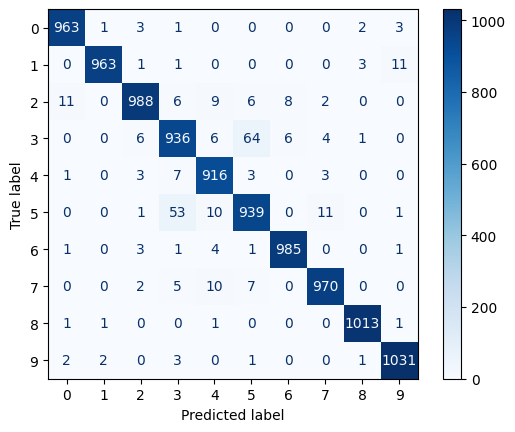

In [50]:
# Calculate the predictions on the test set
Y_pred_2 = best_model_svm_2.predict(X_test_2)

# Calculate the predictions on the blind set
Y_blind_2 = best_model_svm_2.predict(X_blind_2)

# Make a DataFrame with the predictions
predictions = pd.DataFrame(Y_blind_2)

# Save the DataFrame to a .csv file
predictions.to_csv('d2_1836098.csv', index=False)

# Printing of the accuracy
print("Accuracy:", accuracy_score(y_test_2, Y_pred_2))

# Printing of the classification report
print(classification_report(y_test_2, Y_pred_2))

# Printing of the confusion matrix
print(confusion_matrix(y_test_2, Y_pred_2))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test_2, Y_pred_2)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model_svm_2.classes_)
disp.plot(cmap=plt.cm.Blues)

# Save the plot
plt.savefig('confusion_matrix_svm_2.png', dpi=300)

### K-Nearst Neighbors

In [9]:
# Parameters to be tested
param_grid = {'n_neighbors': [6,7,8],
              'metric': ['euclidean', 'manhattan'],
              'weights': ['uniform', 'distance']}


# Setup the grid search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, verbose=3, n_jobs=16)

# Start the grid search on your dataset
grid_search.fit(X_train_2, y_train_2)

# Print the best parameters found by the grid search
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: {:.5f}".format(grid_search.best_score_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters:  {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'uniform'}
Best cross-validation score: 0.97108


In [10]:
df = pd.DataFrame(grid_search.cv_results_)
print(df)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_metric  \
0        0.478139      0.257920        59.010653       21.223364    euclidean   
1        0.466512      0.188927        56.330684       18.644706    euclidean   
2        0.857349      0.061416        57.232451       11.879664    euclidean   
3        0.679864      0.322901        54.592001       14.798025    euclidean   
4        0.588692      0.370931        59.149582       10.652836    euclidean   
5        0.586891      0.308505        62.560322       11.078259    euclidean   
6        0.323885      0.023272       224.956671       33.068762    manhattan   
7        0.438509      0.163768       201.938411       22.564080    manhattan   
8        0.584975      0.262430       227.854212       42.479175    manhattan   
9        0.611120      0.258023       203.062959       25.646652    manhattan   
10       0.501566      0.321433       180.912534       13.397335    manhattan   
11       0.673150      0.257

We can easly take the best model using the best_estimator_ attribute of the GridSearchCV object:

In [7]:
best_model_knn_2 = load("best_model_knn_2.joblib")

In [11]:
best_model_knn_2 = grid_search.best_estimator_
dump(best_model_knn_2, 'best_model_knn_2.joblib')

['best_model_knn_2.joblib']

Now we can predict using the best model (so with the best parameters) found with the grid-search.

Accuracy: 0.9679
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       973
           1       0.99      0.99      0.99       979
           2       0.98      0.96      0.97      1030
           3       0.91      0.91      0.91      1023
           4       0.95      0.98      0.96       933
           5       0.92      0.91      0.92      1015
           6       0.99      0.99      0.99       996
           7       0.98      0.97      0.97       994
           8       0.99      0.99      0.99      1017
           9       0.99      0.99      0.99      1040

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

[[ 966    2    1    1    0    0    0    1    1    1]
 [   0  969    1    2    0    0    0    0    1    6]
 [  15    0  990    4    9    5    7    0    0    0]
 [   1    0   10  933    8   59    7    4    1    0]
 [   1    0 

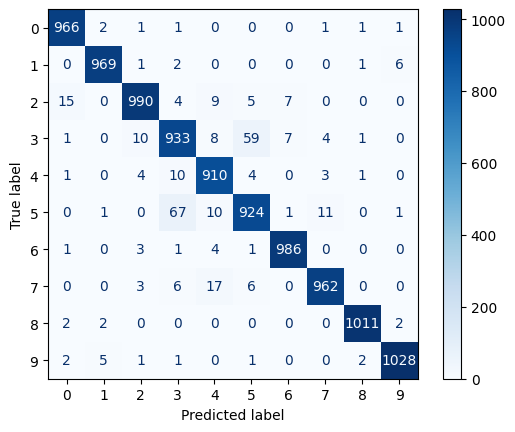

In [32]:
# Predict the labels of the test set
Y_pred_2 = best_model_knn_2.predict(X_test_2)

# Print the accuracy
print("Accuracy:", accuracy_score(y_test_2, Y_pred_2))

# Print the classification report
print(classification_report(y_test_2, Y_pred_2))

# Print the confusion matrix
print(confusion_matrix(y_test_2, Y_pred_2))

# PLot the confusion matrix
conf_matrix = confusion_matrix(y_test_2, Y_pred_2)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model_knn_2.classes_)
disp.plot(cmap=plt.cm.Blues)

# Save the plot
plt.savefig('confusion_matrix_knn_2.png', dpi=300)

### Random Forest

In [100]:
# Define the parameters to optimize
param_grid = {
    'n_estimators': [5, 10],
    'max_depth': [None, 3, 5],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2]
}

# Make the grid search on a RandomForestClassifier using the parameters above
grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=3, n_jobs=16, verbose=3)

# Fit the grid search on your dataset
grid_search.fit(X_train_2, y_train_2)

# Print the best parameters found by the grid search
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: {:.5f}".format(grid_search.best_score_))

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10}
Best cross-validation score: 0.96532


In [101]:
df = pd.DataFrame(grid_search.cv_results_)
print(df)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       17.475131      4.274172         0.054208        0.001346   
1       60.161515      3.971218         0.093272        0.002325   
2       28.138315      5.724411         0.156057        0.097523   
3       43.265424     10.515080         0.135873        0.071319   
4       24.085015      3.473263         0.055995        0.003860   
5       37.403985     10.459889         0.086572        0.006619   
6       34.984293      3.397515         0.090871        0.057147   
7       40.035910     11.386570         0.091989        0.008387   
8        9.094041      1.576142         0.095602        0.035642   
9       15.223546      6.524487         0.191693        0.091967   
10       9.001223      0.865912         0.090335        0.035674   
11      13.349580      5.906101         0.182372        0.086723   
12       7.226336      3.103373         0.094064        0.038088   
13      13.590740      4.751129         0.129193

We can easly take the best model using the best_estimator_ attribute of the GridSearchCV object:

In [29]:
best_model_rf_2 = load("best_model_rf_2.joblib")

In [102]:
best_model_rf_2 = grid_search.best_estimator_
dump(best_model_rf_2, 'best_model_rf_2.joblib')

['best_model_rf_2.joblib']

Now we can predict using the best model (so with the best parameters) found with the grid-search.

Accuracy: 0.9679
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       973
           1       0.99      0.99      0.99       979
           2       0.98      0.96      0.97      1030
           3       0.91      0.91      0.91      1023
           4       0.95      0.98      0.96       933
           5       0.92      0.91      0.92      1015
           6       0.99      0.99      0.99       996
           7       0.98      0.97      0.97       994
           8       0.99      0.99      0.99      1017
           9       0.99      0.99      0.99      1040

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

[[ 966    2    1    1    0    0    0    1    1    1]
 [   0  969    1    2    0    0    0    0    1    6]
 [  15    0  990    4    9    5    7    0    0    0]
 [   1    0   10  933    8   59    7    4    1    0]
 [   1    0 

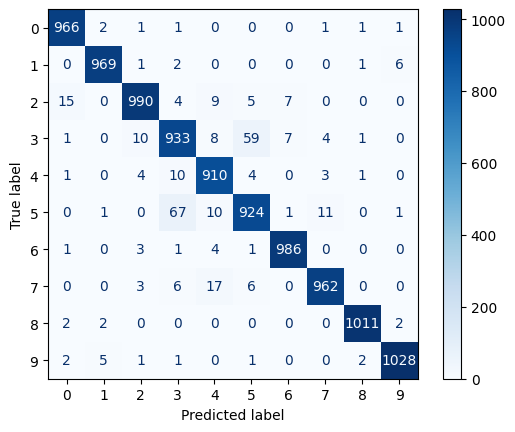

In [31]:
# Predict the labels of the test set
Y_pred_1 = best_model_rf_2.predict(X_test_2)

# Print the accuracy
print("Accuracy:", accuracy_score(y_test_2, Y_pred_2))

# Print the classification report
print(classification_report(y_test_2, Y_pred_2))

# Print the confusion matrix
print(confusion_matrix(y_test_2, Y_pred_2))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test_2, Y_pred_2)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model_rf_2.classes_)
disp.plot(cmap=plt.cm.Blues)

# Save the plot
plt.savefig('confusion_matrix_rf_2.png', dpi=300)